# Sentiment Analysis For Urgency Level in JakRespons

## Introduction
Based on the dataset that we get from Jaki, the common report that Jakarta resident gives there is a problem with illegal parking, garbage, road, dense tree and flood. With the unstructured data in JakiRespon from the user, we try to create a model with sentiment analysis using TensorFlow based on the urgency level of the description report.

Analyzing the urgency level of the report giving benefit from the government, e.g :
* They can filter user report based on sentiments to identify things they have to do immediately about their problem.
* The operator can manage their online reputation easily by monitoring the sentiment of report residents write about their problem.

Here we go to test the sample of JakiRespon dataset  with a sentiment analysis model using Tensorflow : 

## 1. Import Library and Check The Dataset

In [ ]:
# Here the library that we use to build our model

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf 
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding

from google.colab import files

2.5.0


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#dataset is a parameter to get the data from gdrive
dataset = pd.read_excel('/gdrive/MyDrive/Capstone Project/JakRespons-Sample.xlsx')
dataset.head()

,kategori,deskripsi,sentiment
0,Fasilitas Sosial/Fasilitas Umum,lampu jalanan mati di Jl. Cemara II RT08/08 Du...,Not Urgent
1,Parkir liar,parkir liar bikin sempit jalan...\nbelakang po...,Not Urgent
2,Parkir liar,hallo admin mau lapor ada motor vespa modifika...,Not Urgent
3,Sampah,sampah karung batu puingnya tolong diangkut di...,Urgent
4,Banjir,"posisi di belakang Kelurahan Petamburan, Tepa...",Urgent


In [ ]:
df = pd.DataFrame(dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kategori   600 non-null    object
 1   deskripsi  600 non-null    object
 2   sentiment  600 non-null    object
dtypes: object(3)
memory usage: 14.2+ KB


In [ ]:
#select relavant columns and drop others
df1 = df.drop(['kategori'], axis = 1)
df1

,deskripsi,sentiment
0,lampu jalanan mati di Jl. Cemara II RT08/08 Du...,Not Urgent
1,parkir liar bikin sempit jalan...\nbelakang po...,Not Urgent
2,hallo admin mau lapor ada motor vespa modifika...,Not Urgent
3,sampah karung batu puingnya tolong diangkut di...,Urgent
4,"posisi di belakang Kelurahan Petamburan, Tepa...",Urgent
...,...,...
595,kp. kurus gang masjid RT 009 RW 006. jalur kal...,Urgent
596,Apartemen Belmont Residences tdk ada saluran a...,Urgent
597,Batang pohon sudah mengenai kabel listrik.\nlo...,Urgent
598,parkir liar motor di atas trotoar,Not Urgent


In [ ]:
df1.sentiment.value_counts()

Urgent        300
Not Urgent    300
Name: sentiment, dtype: int64

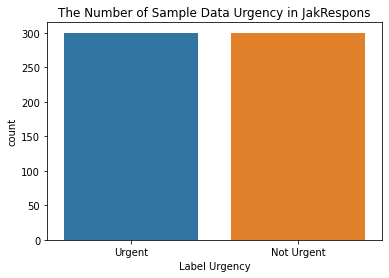

In [ ]:
sns.countplot(
  x='sentiment',
  data=df1,
  order=df1.sentiment.value_counts().index
)

plt.xlabel("Label Urgency")
plt.title("The Number of Sample Data Urgency in JakRespons");

In [ ]:
urgent_report = df1[df1.sentiment == "Urgent"]
noturgent_report = df1[df1.sentiment == "Not Urgent"]

In [ ]:
text1 = ",".join(map(str, urgent_report['deskripsi'] ))
text2 = ",".join(map(str, noturgent_report['deskripsi']))

text1_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text1)
text2_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text2)

def show_word_cloud(cloud, title):
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

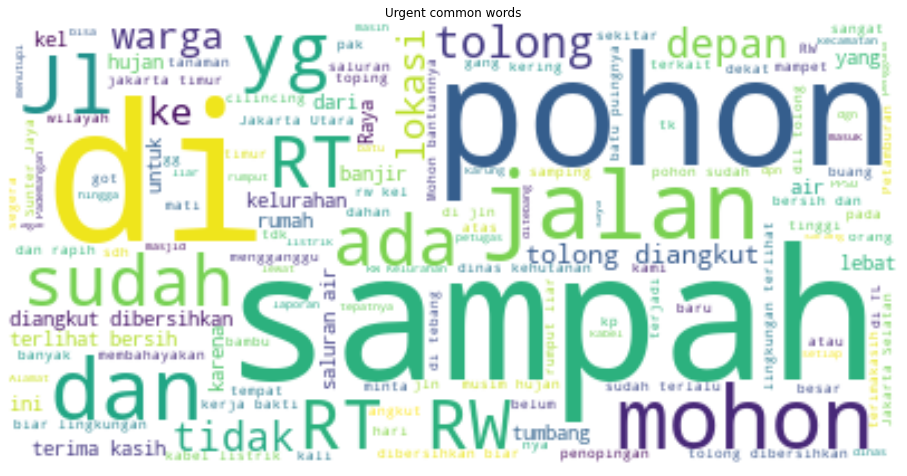

In [ ]:
show_word_cloud(text1_cloud, "Urgent common words")

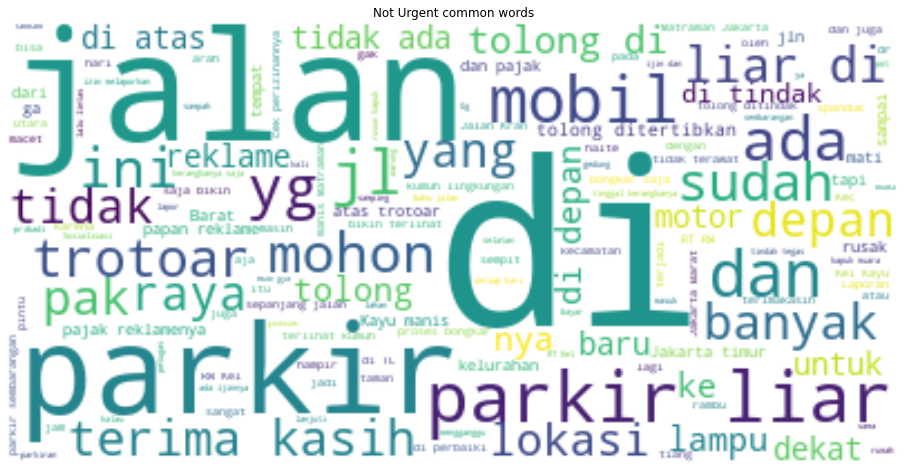

In [ ]:
show_word_cloud(text2_cloud, "Not Urgent common words")

## 2. Create The Sentiment Analysis Model

In [ ]:
# convert sentiment label to numeric
sentiment_label = df1.sentiment.factorize()

In [ ]:
# print it out, index 0 is Not Urgent and index 1 is Urgent sentiment respectively.
sentiment_label

(array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [ ]:
# Make a parameter of deskripsi coloum for tokenizing
report = df1.deskripsi.values

In [ ]:
# Get initialize the tokenizer with a 3000 word unique limit. 
tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(report)
word_index = tokenizer.word_index

print(word_index)

{'<OOV>': 1, 'di': 2, 'jalan': 3, 'dan': 4, 'tolong': 5, 'parkir': 6, 'sampah': 7, 'pohon': 8, 'rt': 9, 'mohon': 10, 'ada': 11, 'rw': 12, 'tidak': 13, 'jl': 14, 'sudah': 15, 'liar': 16, 'jakarta': 17, 'yg': 18, 'depan': 19, 'ini': 20, 'kel': 21, 'mobil': 22, 'trotoar': 23, 'kasih': 24, 'lingkungan': 25, 'air': 26, 'terima': 27, 'lokasi': 28, 'dibersihkan': 29, 'untuk': 30, 'ke': 31, 'raya': 32, 'timur': 33, 'yang': 34, 'jln': 35, 'kelurahan': 36, 'saluran': 37, 'warga': 38, 'hujan': 39, 'banyak': 40, 'nya': 41, 'terlihat': 42, 'baru': 43, 'pak': 44, 'tindak': 45, 'saja': 46, 'barat': 47, 'diangkut': 48, 'dari': 49, 'utara': 50, 'lampu': 51, 'biar': 52, 'karena': 53, 'bikin': 54, '2': 55, 'sangat': 56, '04': 57, 'rumah': 58, 'hari': 59, 'reklame': 60, 'sepanjang': 61, 'kec': 62, 'mengganggu': 63, 'tl': 64, 'bersih': 65, '1': 66, 'dekat': 67, 'mati': 68, 'atas': 69, 'tempat': 70, 'no': 71, 'kayu': 72, 'kabel': 73, 'selatan': 74, 'listrik': 75, 'ga': 76, 'dinas': 77, 'ditertibkan': 78, 't

In [ ]:
# The maximum length of text for training and testing data
encoded_report = tokenizer.texts_to_sequences(report)
padded_sequence = pad_sequences(encoded_report, maxlen=100)

print(report[0])
print(encoded_report[0])

lampu jalanan mati di Jl. Cemara II RT08/08 Duri Kosambi, Cengkareng, Jakarta Barat
[51, 200, 68, 2, 14, 514, 116, 515, 92, 301, 257, 158, 17, 47]


In [ ]:
#vocab_size = 10000
# embedding_dim =32

embedding_dim = 32
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Build model

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=100) )
model.add(LSTM(50, dropout=0.5))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 32)           70176     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 306       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 87,089
Trainable params: 87,089
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],
                  validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
15/15 [==============================] - 3s 82ms/step - loss: 0.6930 - accuracy: 0.4917 - val_loss: 0.6928 - val_accuracy: 0.4750
Epoch 2/30
15/15 [==============================] - 1s 49ms/step - loss: 0.6888 - accuracy: 0.6000 - val_loss: 0.6876 - val_accuracy: 0.5500
Epoch 3/30
15/15 [==============================] - 1s 48ms/step - loss: 0.6598 - accuracy: 0.7521 - val_loss: 0.6598 - val_accuracy: 0.5750
Epoch 4/30
15/15 [==============================] - 1s 47ms/step - loss: 0.5601 - accuracy: 0.8438 - val_loss: 0.5440 - val_accuracy: 0.7833
Epoch 5/30
15/15 [==============================] - 1s 49ms/step - loss: 0.3475 - accuracy: 0.9125 - val_loss: 0.3699 - val_accuracy: 0.8500
Epoch 6/30
15/15 [==============================] - 1s 52ms/step - loss: 0.1829 - accuracy: 0.9542 - val_loss: 0.4411 - val_accuracy: 0.8000
Epoch 7/30
15/15 [==============================] - 1s 48ms/step - loss: 0.1107 - accuracy: 0.9729 - val_loss: 0.3556 - val_accuracy: 0.8833
Epoch 8/30
15

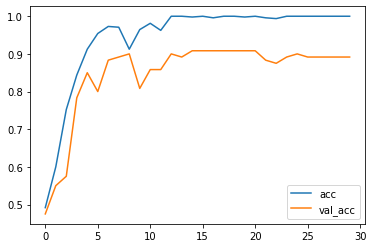

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

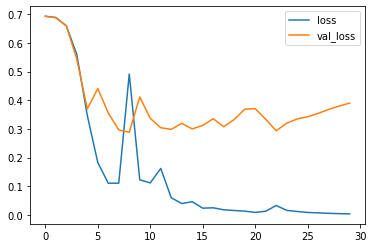

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
test_word ="sampah menumpuk di pinggir jalan"
tw = tokenizer.texts_to_sequences([test_word])
tw

[[7, 749, 2, 162, 3]]

In [ ]:
tw = pad_sequences(tw,maxlen=100)
tw

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 749,   2, 162,   3]], dtype=int32)

In [ ]:
prediction = int(model.predict(tw).round().item())

In [ ]:
sentiment_label[1][prediction]

'Urgent'

In [ ]:
test_word ="papan iklan mohon disingkirkan"
tw = tokenizer.texts_to_sequences([test_word])
tw

[[127, 879, 10, 1]]

In [ ]:
tw = pad_sequences(tw,maxlen=100)
tw

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 127, 879,  10,   1]], dtype=int32)

In [ ]:
prediction = int(model.predict(tw).round().item())

In [ ]:
sentiment_label[1][prediction]

'Not Urgent'

In [ ]:
save_model = "JakiChan"
tf.saved_model.save(model, save_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: JakiChan/assets


INFO:tensorflow:Assets written to: JakiChan/assets


In [ ]:
model.save("JakiChan.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

tflite_model_file = 'JakiChan.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

files.download("JakiChan.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>